In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('/content/combined_file3.csv')

In [7]:
data.head()

,channel_id,title,description,published_at,country,language,subscribers,hidden_subscribers,views,video_count,...,keywords,external_links,video_title,average_video_views,avg_video_duration,comments,top_video_tags,genre,avg_engagement_rate,avg_views_per_video
0,UCLxAS02eWvfZK4icRNzWD_g,Music Travel Love,Welcome to the official Music Travel Love YouT...,2016-06-03T20:19:25Z,US,NaN,5630000,False,2255501054,108.0,...,"musictravellove ""music travel love"" acoustic l...",NaN,['When a Man Loves a Woman - Music Travel Love...,3633925.6,228.2,7020.0,"['Lyrics', 'Acoustic', 'My Girl', 'Mexico', 'M...",music,NaN,NaN
1,UCaCE5pzy49M8nQ59plgmFOA,Relax Cafe Music,If you received a copyright claim for using my...,2013-08-23T09:13:56Z,US,NaN,885000,False,361978571,960.0,...,10hours 1hour music relax piano cafe jazz,NaN,['Wednesday Morning Jazz - Sweet November Boss...,39690.8,27697.4,114.0,"['happy jazz', 'jazz', 'sunday jazz', 'bossa n...",music,NaN,NaN
2,UCyKs4L4EULCfySbTybA9bAg,Music Brokers,Music Brokers is the channel for extended play...,2010-04-20T14:36:08Z,AR,NaN,1550000,False,912540320,2682.0,...,"music ""covers of popular songs"" ""bossa nova co...",NaN,"['Bossa Nova Beach 2025 🏝️', 'Covers Of Popula...",4030.8,9114.8,6.0,"['favorites 2025 covers', 'rooftop lounge musi...",music,NaN,NaN
3,UC3aVeoLde-l7GDpT22oDoPA,Songs of Birdland,We’re musicians and the proud parents of two w...,2015-09-25T15:41:36Z,ES,en,390000,False,145892175,463.0,...,"""b​aby sensory"" ""calming bedtime songs for bab...",NaN,"[""Brahms' Lullaby 💙 Super Relaxing Cello & Pia...",5375.8,4300.4,0.0,"['piano', 'love', 'gentle jazz for sleep', 'ba...",music,NaN,NaN
4,UCwVQIkAtyZzQSA-OY1rsGig,Chill Music Lab,Choose the soundtrack for your most productive...,2019-07-05T21:39:11Z,US,en,1290000,False,214237591,341.0,...,"""work music"" Chillstep ""background music"" ""Ins...",NaN,['Work Music — Late Evening Productivity Playl...,12592.6,6314.6,35.0,"['deep music', 'chill coding music', 'music la...",music,NaN,NaN


In [8]:
data.shape

(4704, 21)

In [9]:
data.isna().sum()

,0
channel_id,0
title,0
description,891
published_at,0
country,1848
language,4409
subscribers,0
hidden_subscribers,485
views,0
video_count,14


In [10]:
data.describe()

,subscribers,views,video_count,external_links,average_video_views,avg_video_duration,comments,avg_engagement_rate,avg_views_per_video
count,4.704000e+03,4.704000e+03,4690.000000,0.0,4.219000e+03,4219.000000,4219.000000,485.000000,4.850000e+02
mean,6.147144e+05,1.599286e+08,685.471855,NaN,1.107899e+05,1048.882508,543.033657,5.516636,5.187438e+05
std,6.629670e+06,1.482484e+09,2320.842961,NaN,1.868724e+06,2382.940716,3987.036254,8.034744,3.302432e+06
min,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,8.600000e+01,1.557475e+04,30.000000,NaN,1.332000e+02,118.000000,0.000000,1.951460,6.930517e+02
50%,4.390000e+03,6.052570e+05,158.000000,NaN,8.044000e+02,313.400000,6.000000,3.863936,2.037578e+04
75%,1.550000e+05,2.545234e+07,609.750000,NaN,7.641000e+03,941.200000,91.500000,6.192639,1.598711e+05
max,4.080000e+08,8.728710e+10,57352.000000,NaN,1.086944e+08,38876.200000,154729.000000,100.000000,6.106031e+07


In [11]:
data['avg_views_per_video'] = data['views'] / data['video_count']
data['avg_engagement_rate'] = (data['comments'] / data['views']) * 100

In [12]:
for i in ["video_count","avg_engagement_rate","avg_views_per_video",'comments','avg_video_duration','average_video_views','hidden_subscribers',]:
    data[i]=data[i].fillna(data[i].median())

In [13]:
for i in ['country','language','keywords','genre']:
  data[i]=data[i].fillna(data[i].mode()[0])

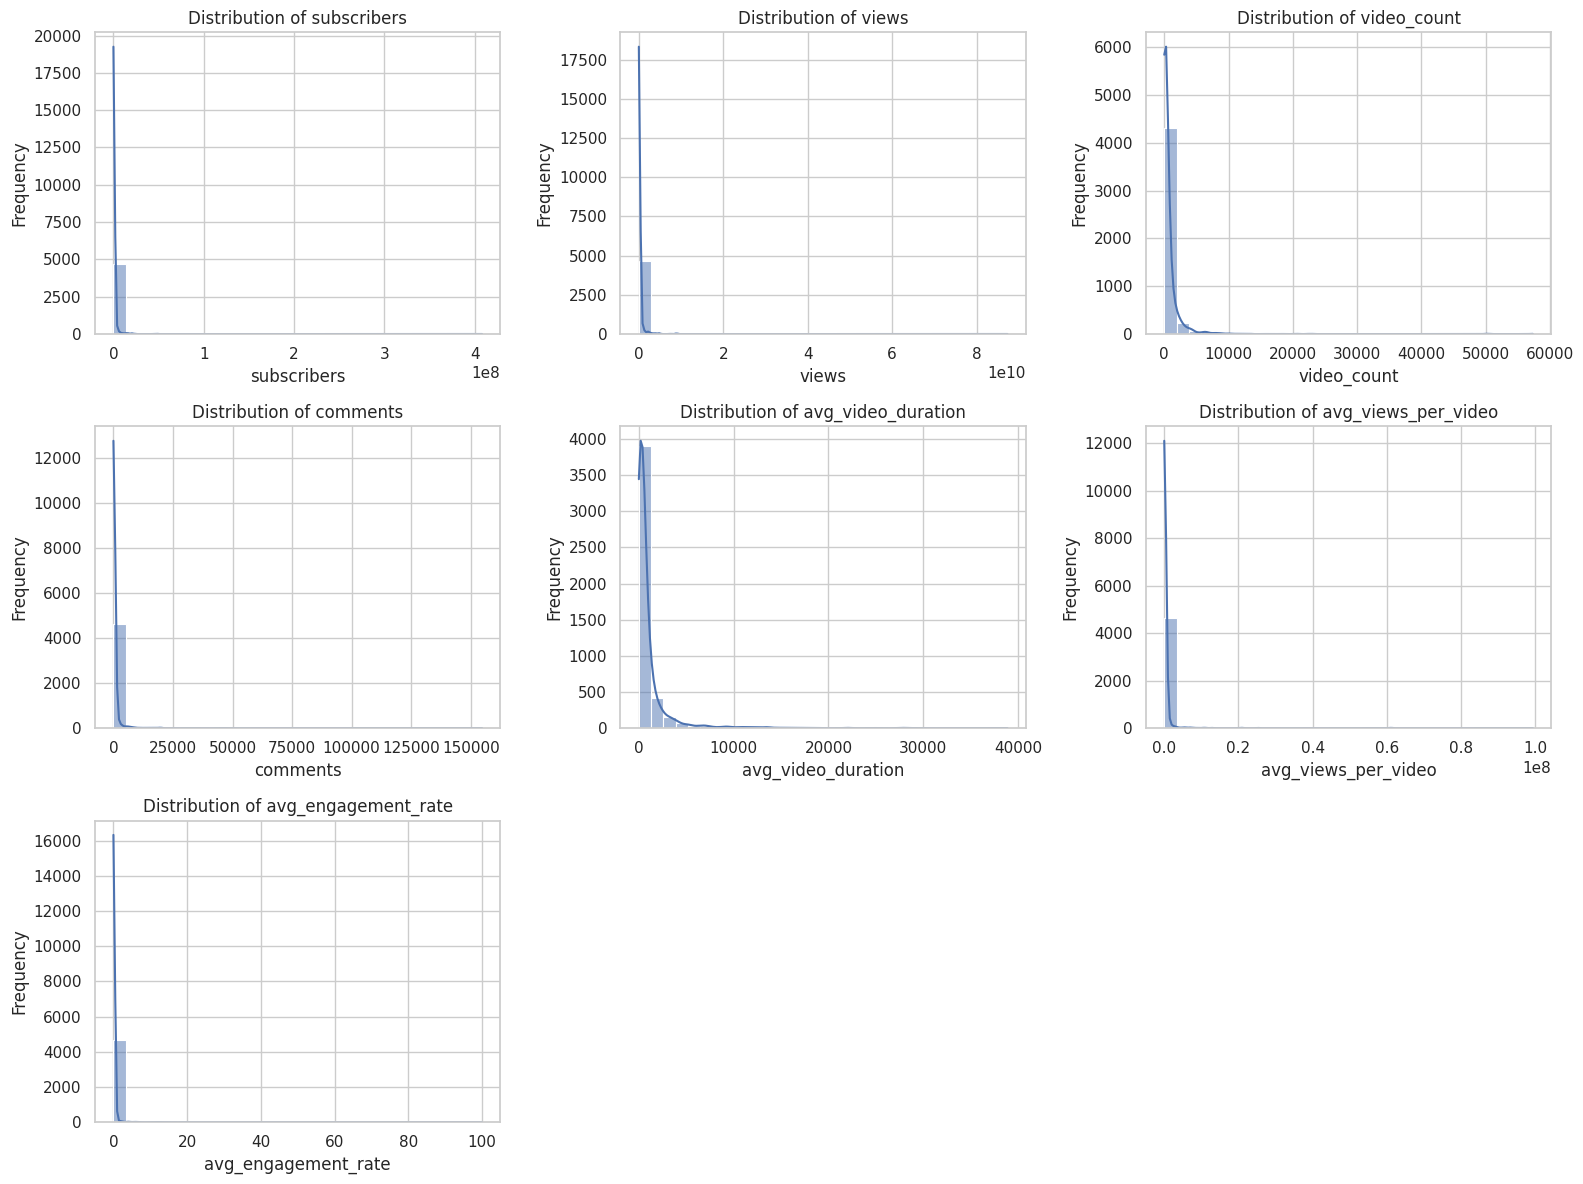

In [14]:
selected_columns = [
    'subscribers', 'views', 'video_count', 'comments',
    'avg_video_duration', 'avg_views_per_video', 'avg_engagement_rate'
]

# Convert to numeric just in case
for col in selected_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
sns.set(style="whitegrid")
num_cols = len(selected_columns)
cols = 3
rows = (num_cols + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()
for i, col in enumerate(selected_columns):
    sns.histplot(data[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
data.drop(columns=["description",'external_links','thumbnail',],inplace=True)

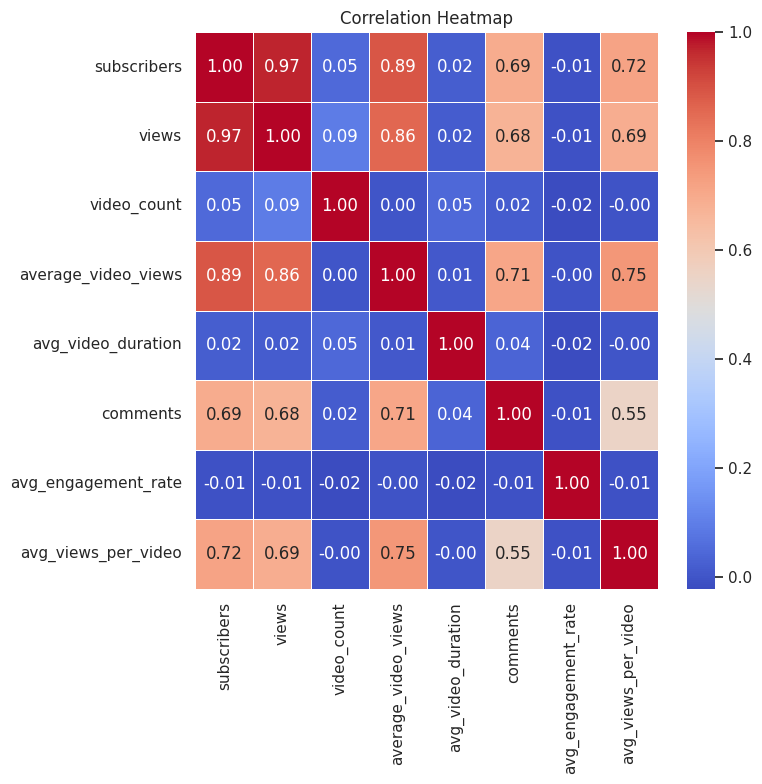

In [16]:
# Compute correlation matrix (only for numeric columns)
corr = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only


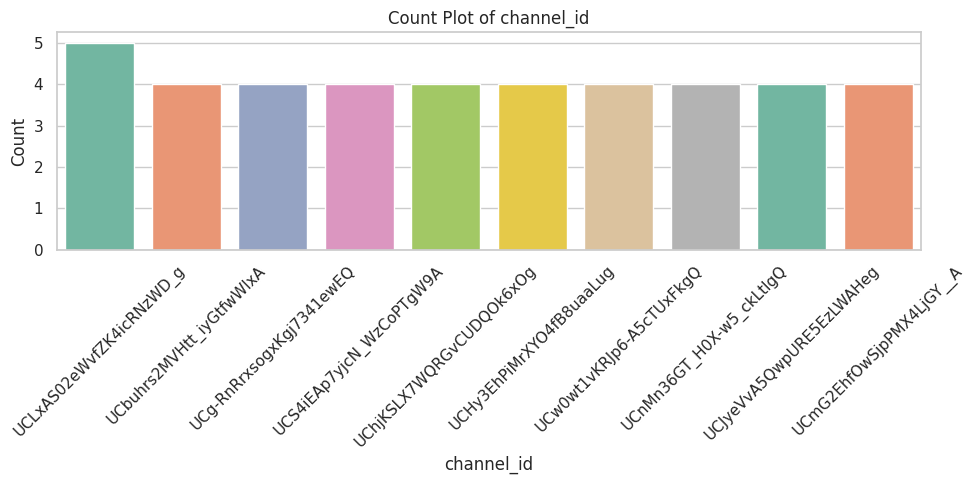

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only


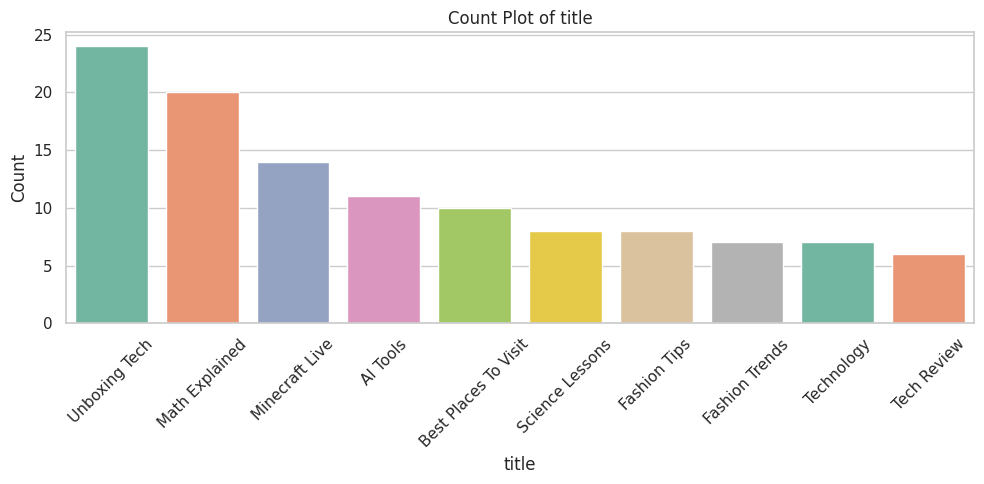

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only


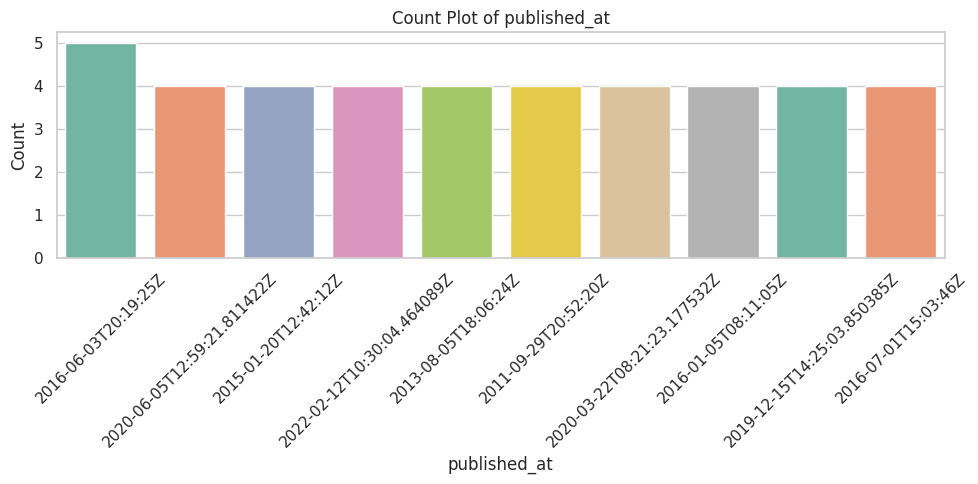

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only


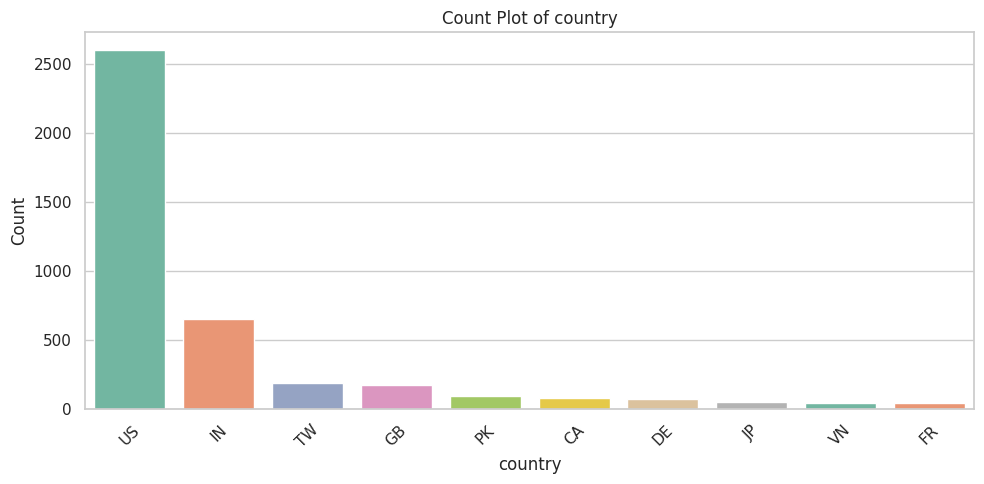

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only


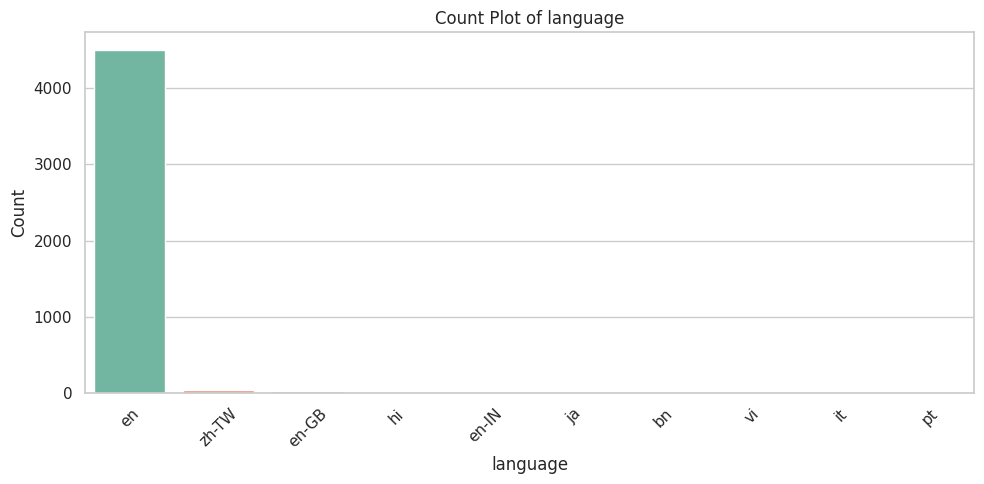

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only


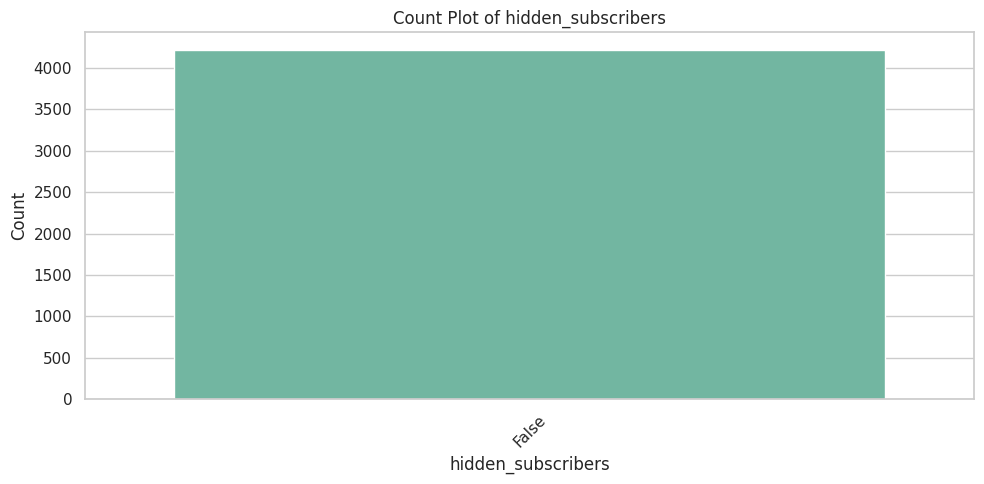

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only
/tmp/ipython-input-17-4131019093.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


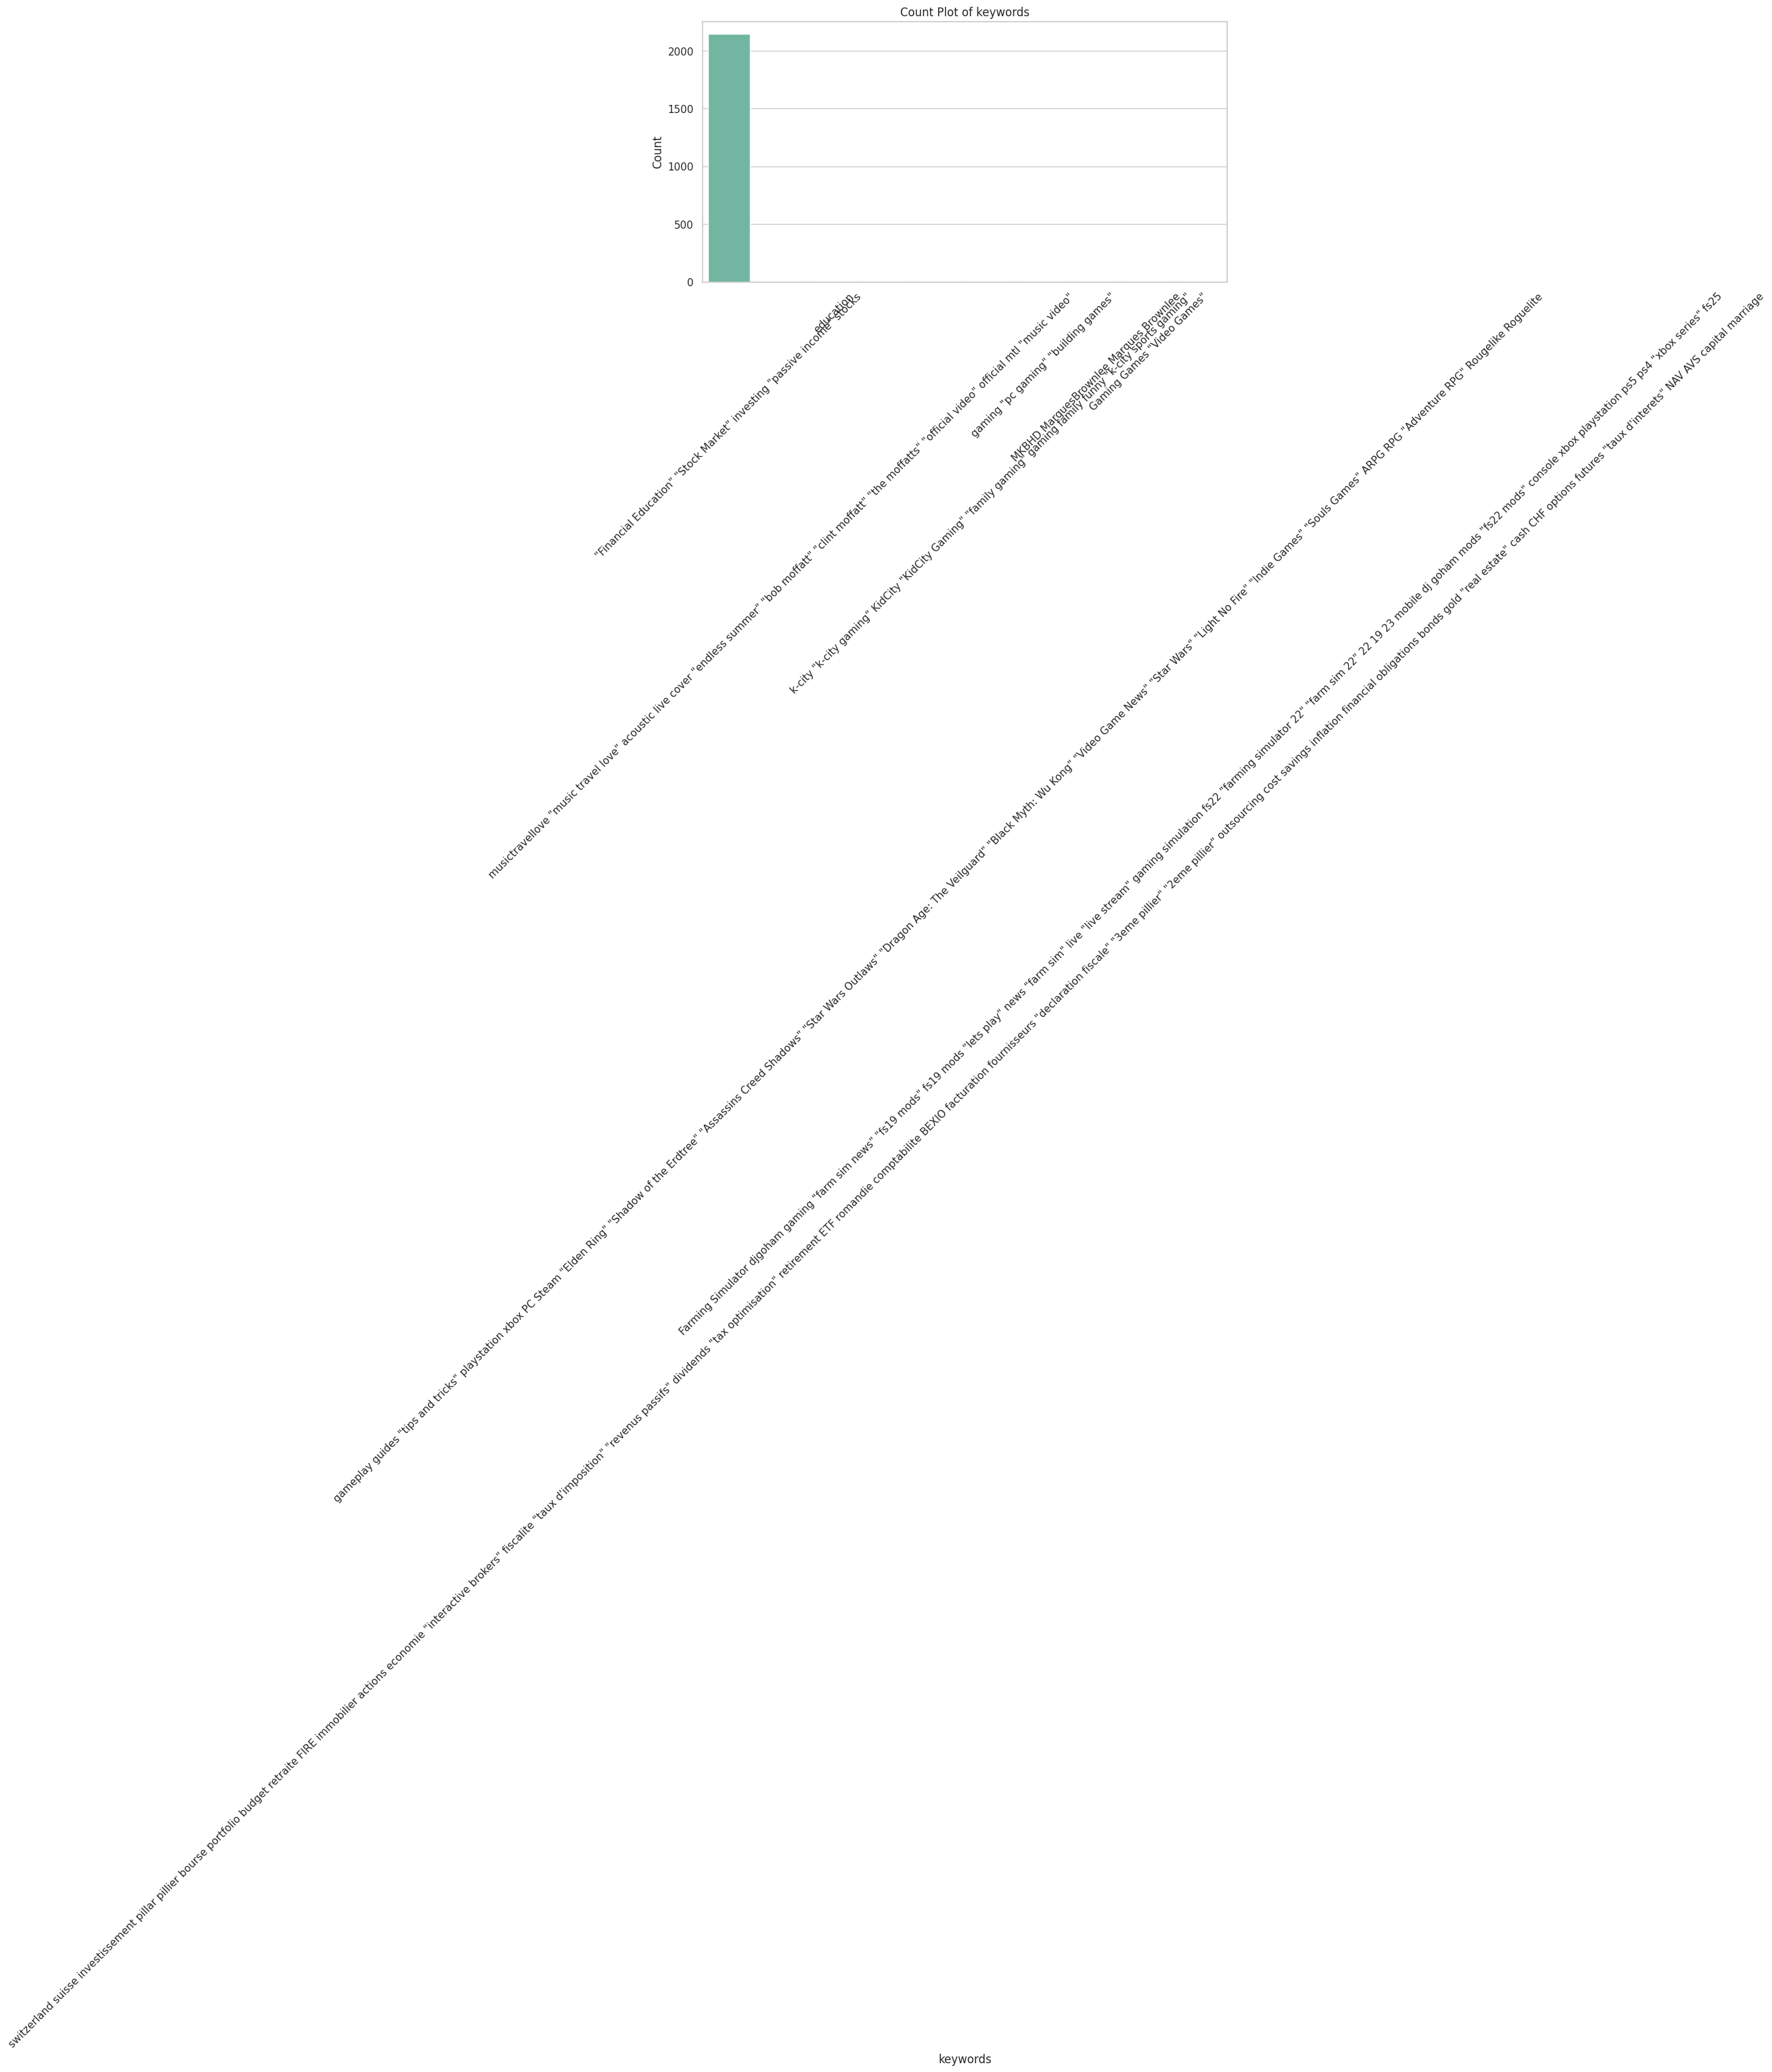

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only
/tmp/ipython-input-17-4131019093.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


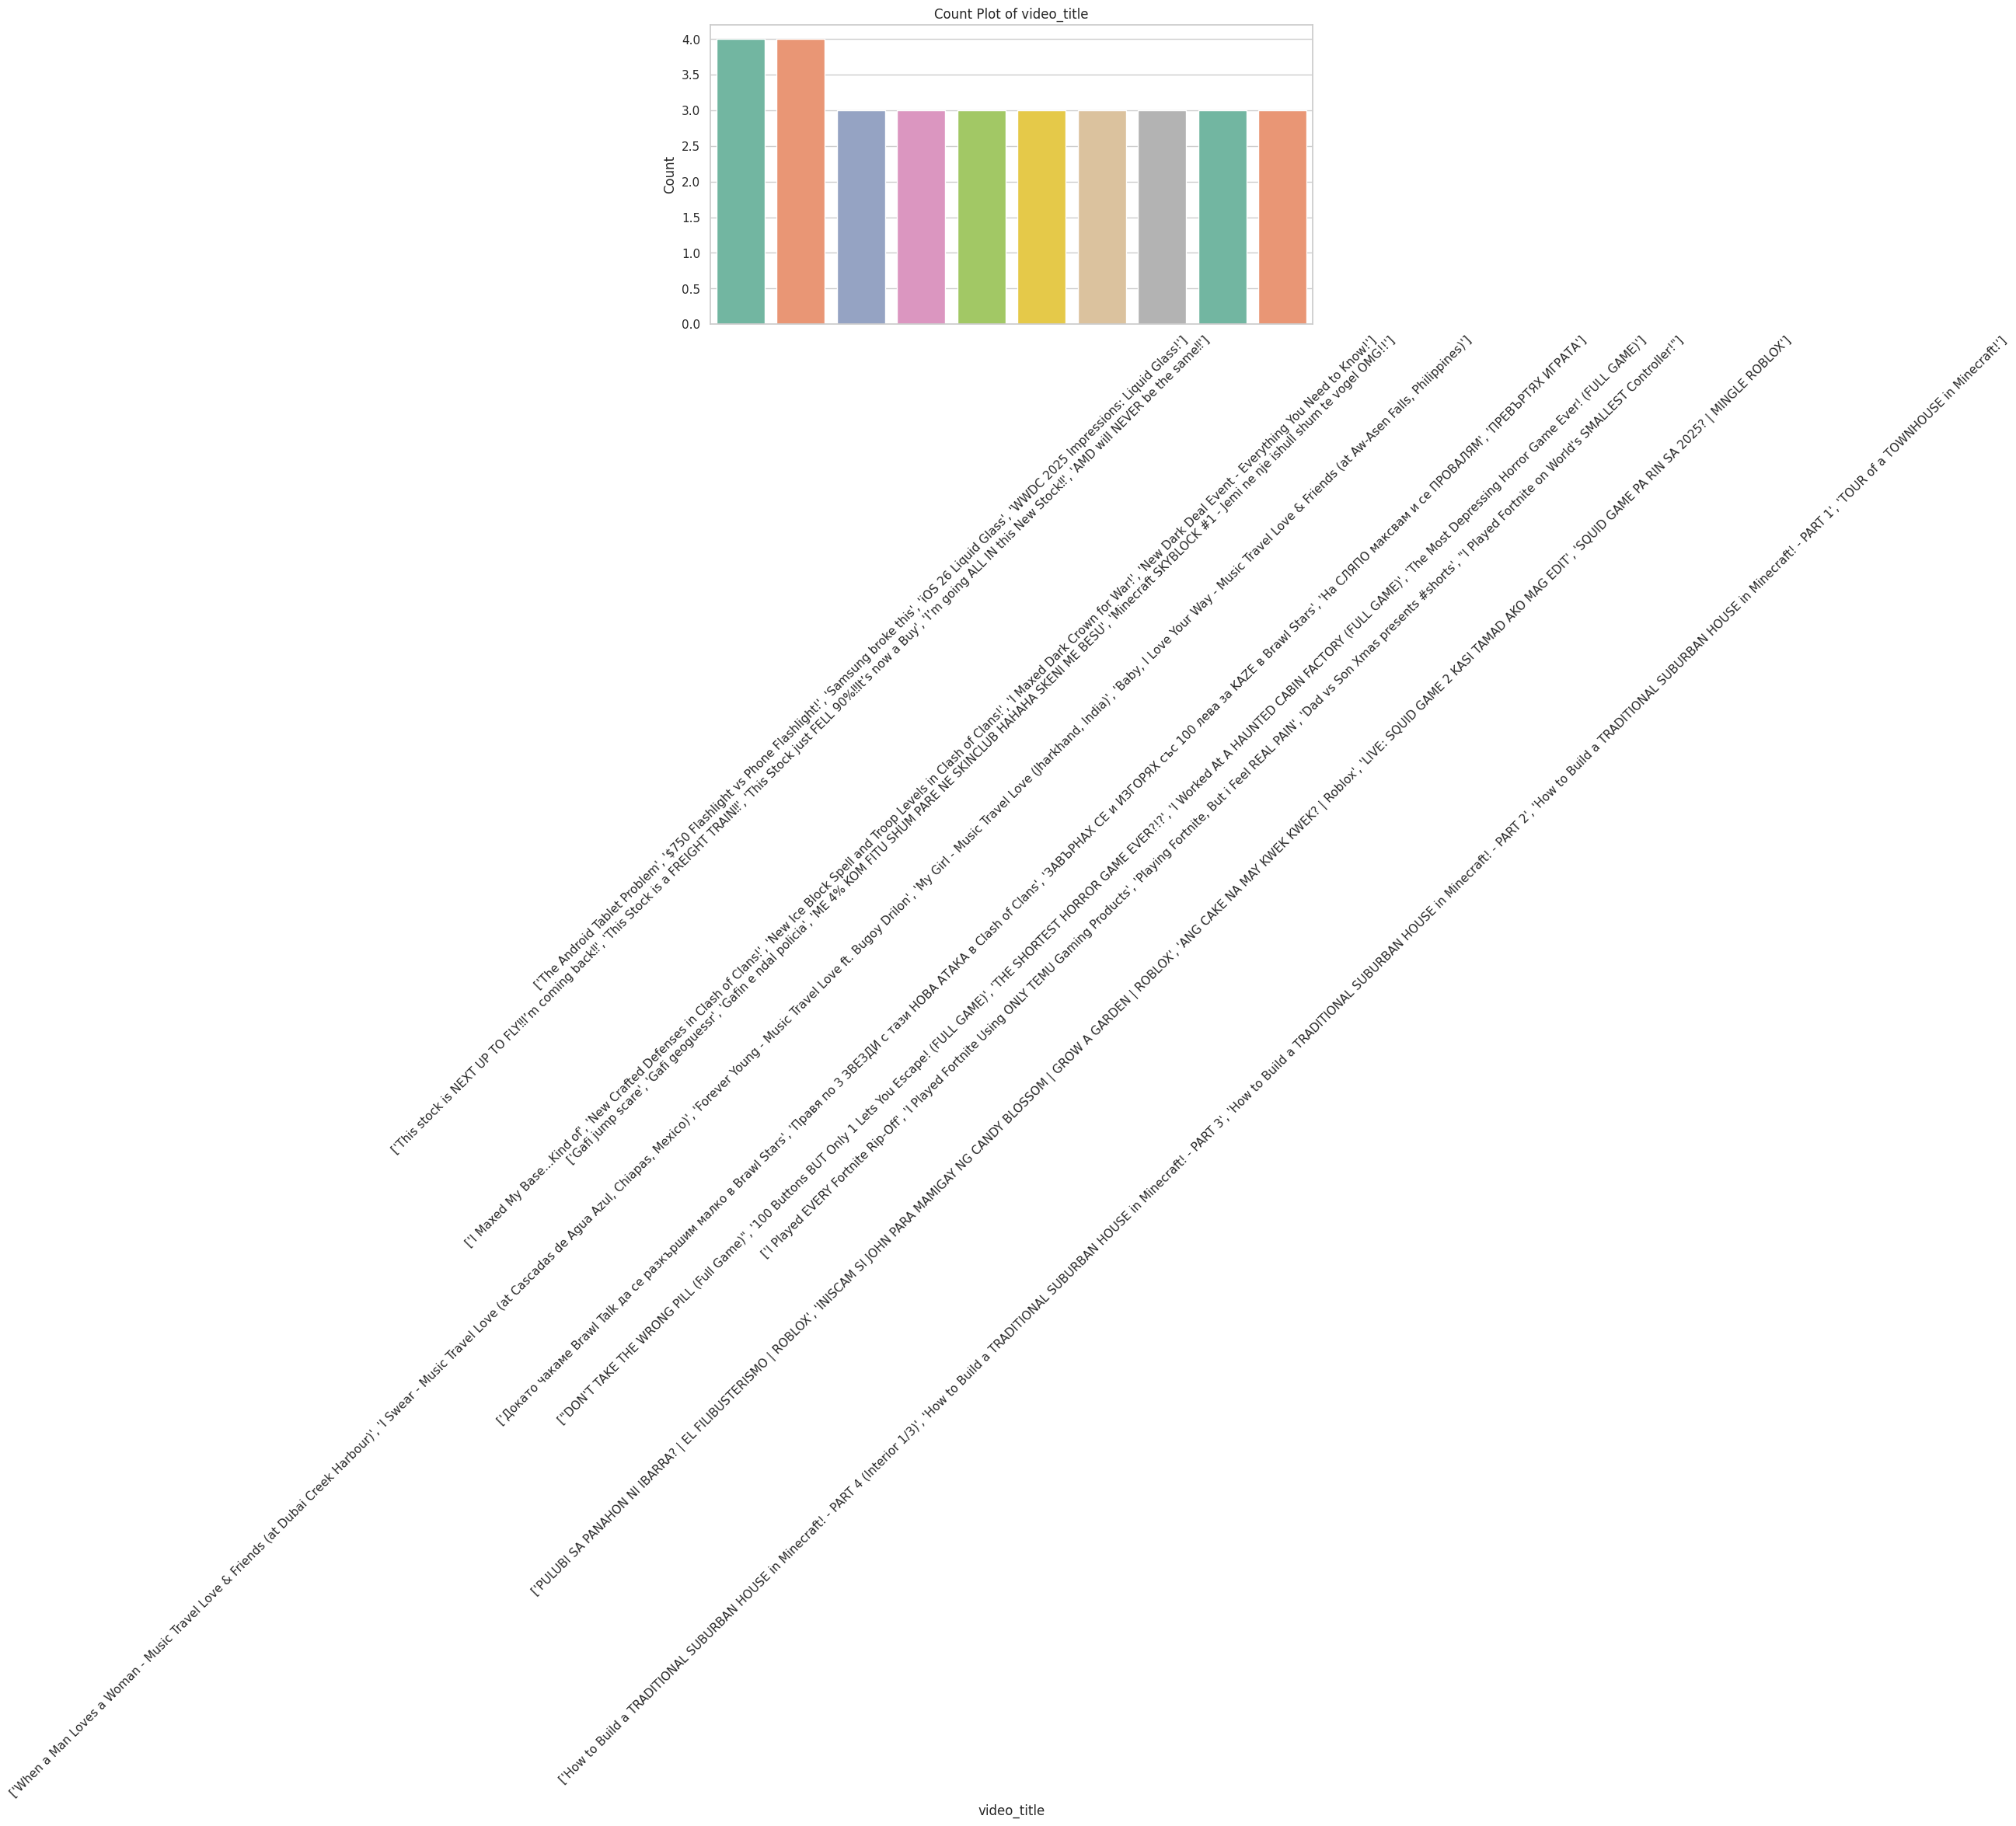

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only
/tmp/ipython-input-17-4131019093.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


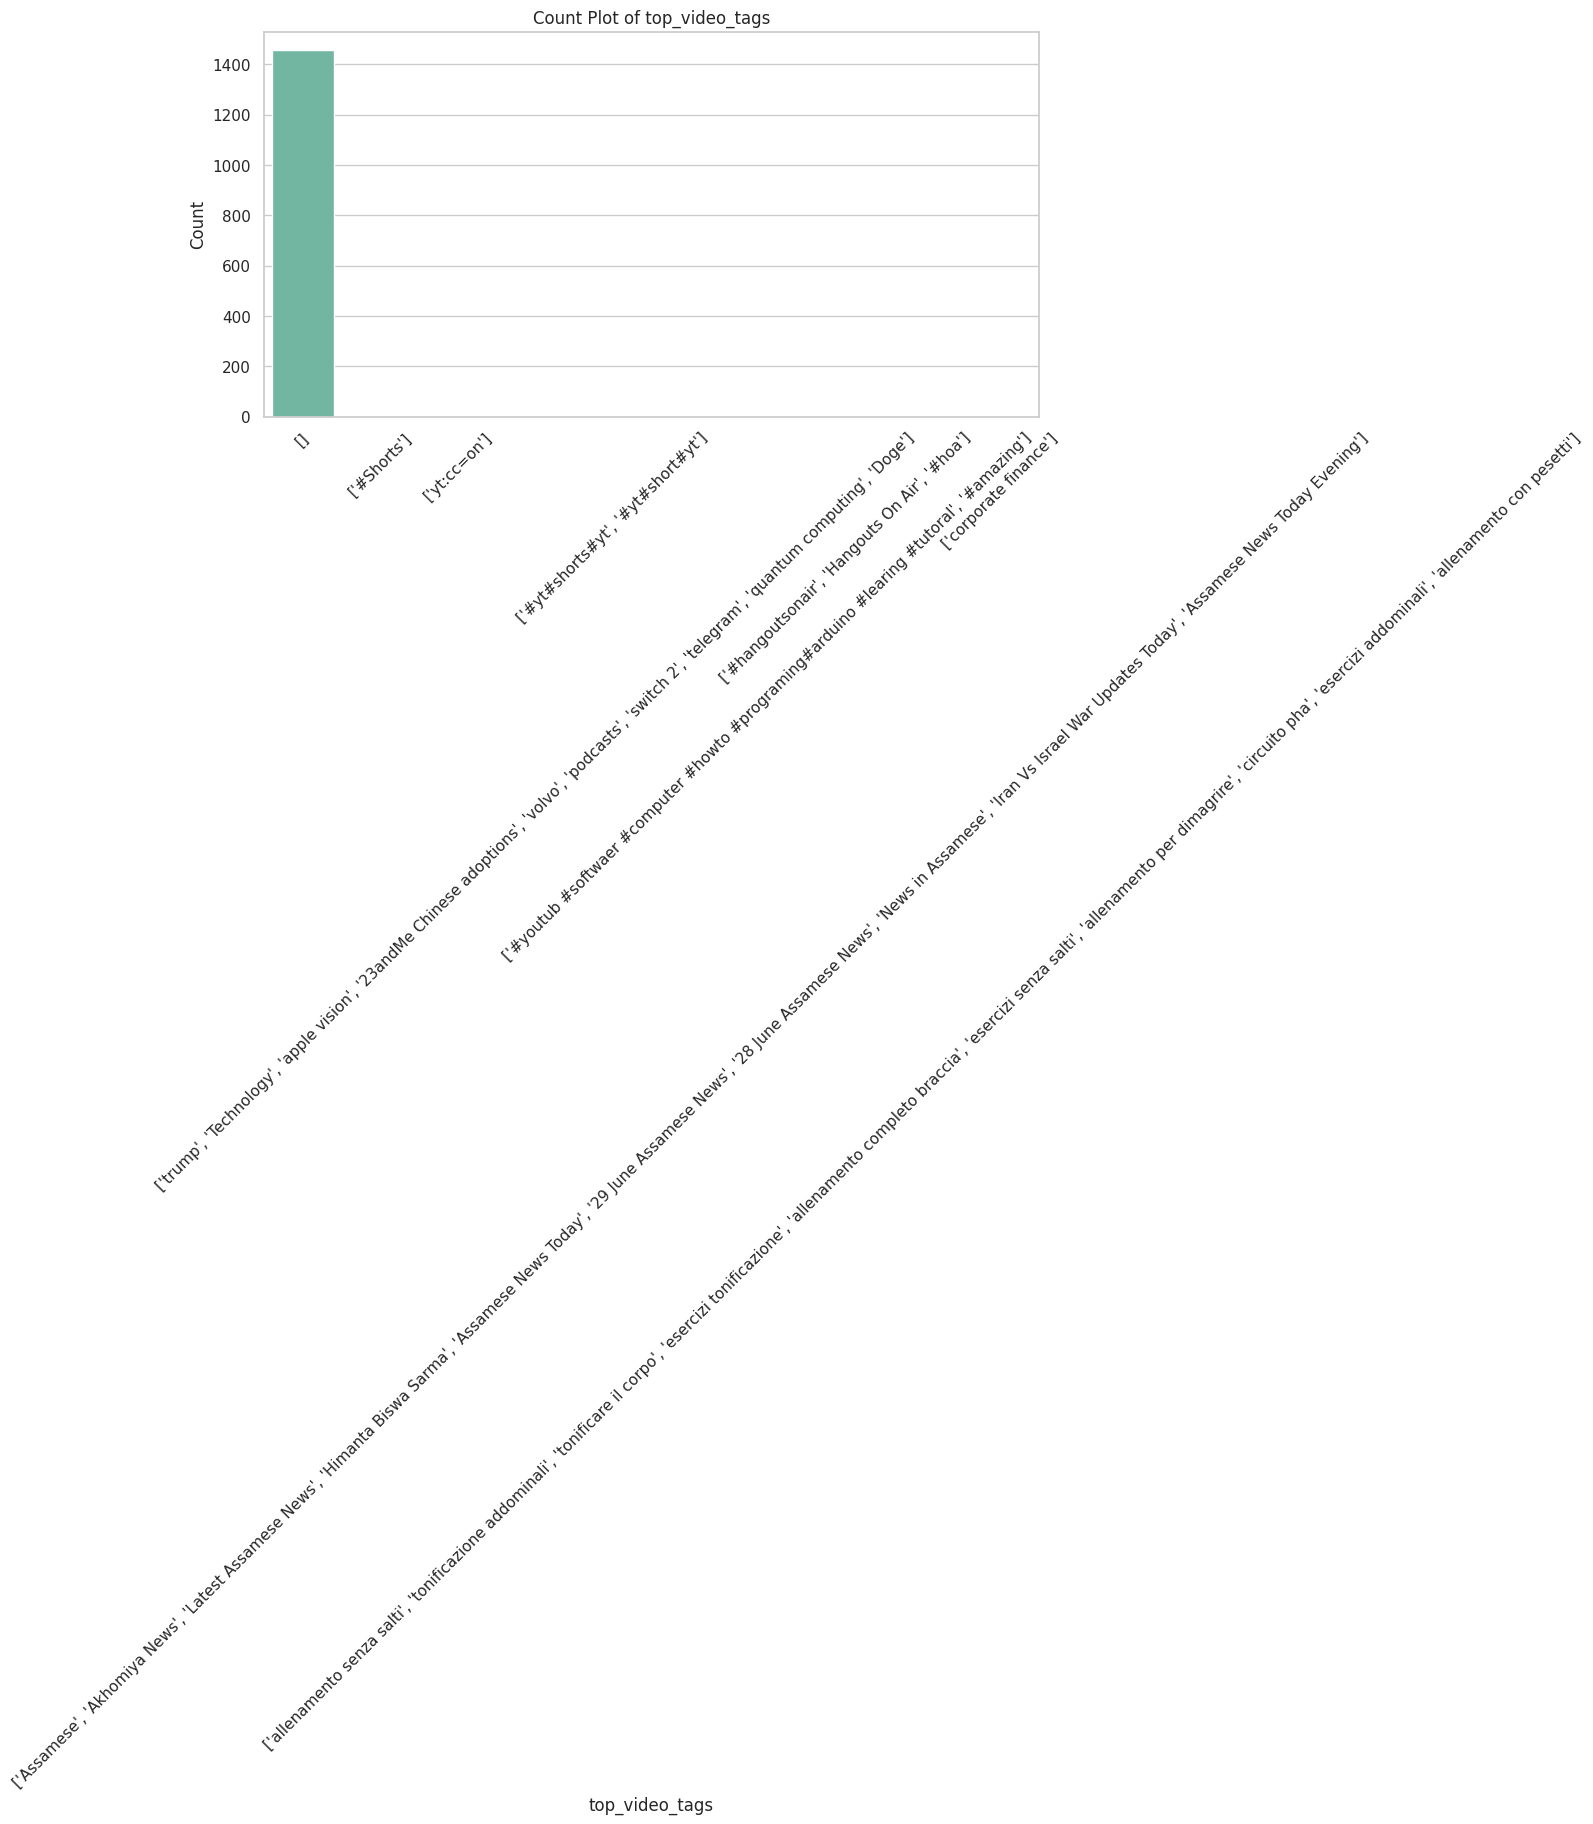

/tmp/ipython-input-17-4131019093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only


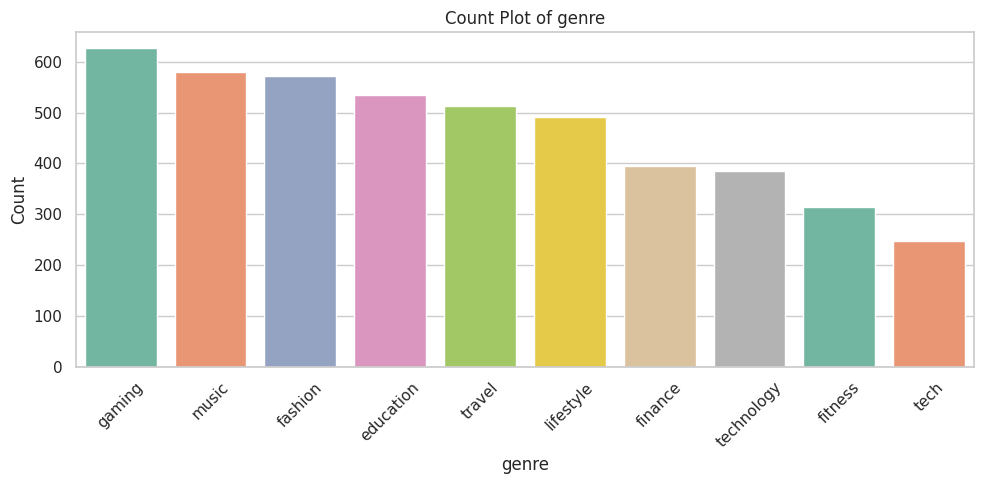

In [17]:
# COUNT PLOT OF CATEGORICAL COLUMNS
categorical_cols = data.select_dtypes(include='object').columns

# Loop through each categorical column and plot
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10], palette='Set2')  # show top 10 only
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

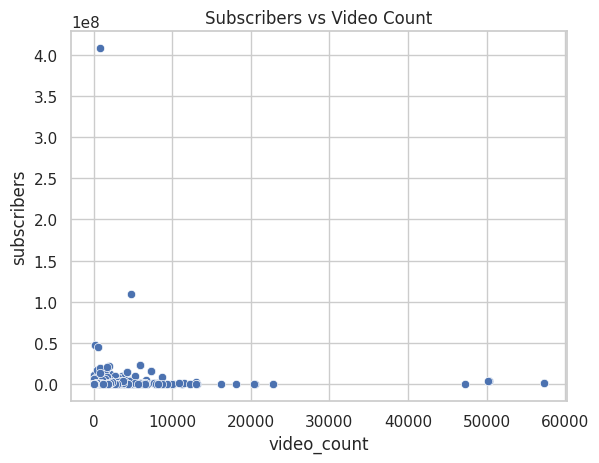

In [18]:
# BIVARIATE ANALYSIS

sns.scatterplot(data=data, x='video_count', y='subscribers')
plt.title('Subscribers vs Video Count')
plt.show()


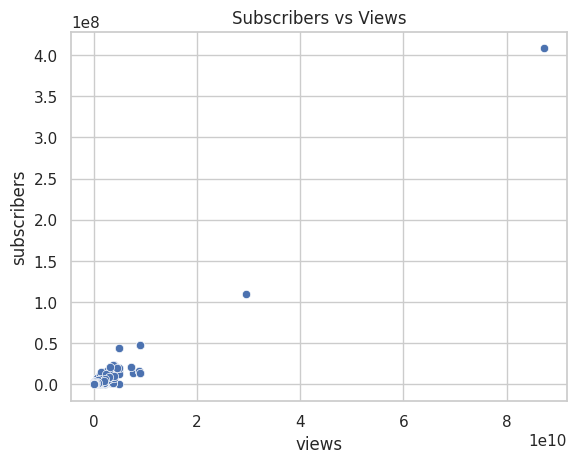

In [19]:
sns.scatterplot(data=data, x='views', y='subscribers')
plt.title('Subscribers vs Views')
plt.show()


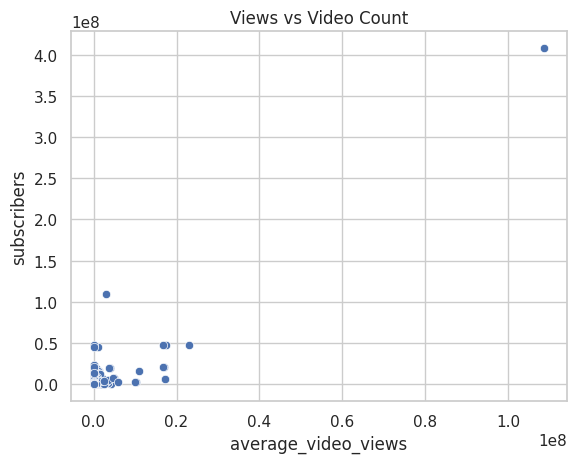

In [20]:
sns.scatterplot(data=data, x='average_video_views', y='subscribers')
plt.title('Views vs Video Count')
plt.show()

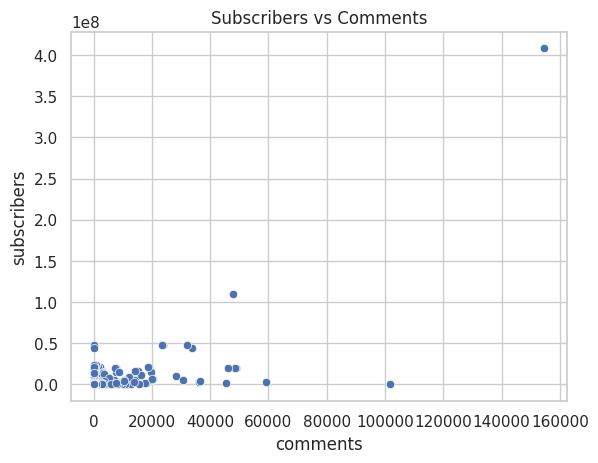

In [21]:
sns.scatterplot(data=data, x='comments', y='subscribers')
plt.title('Subscribers vs Comments')
plt.show()

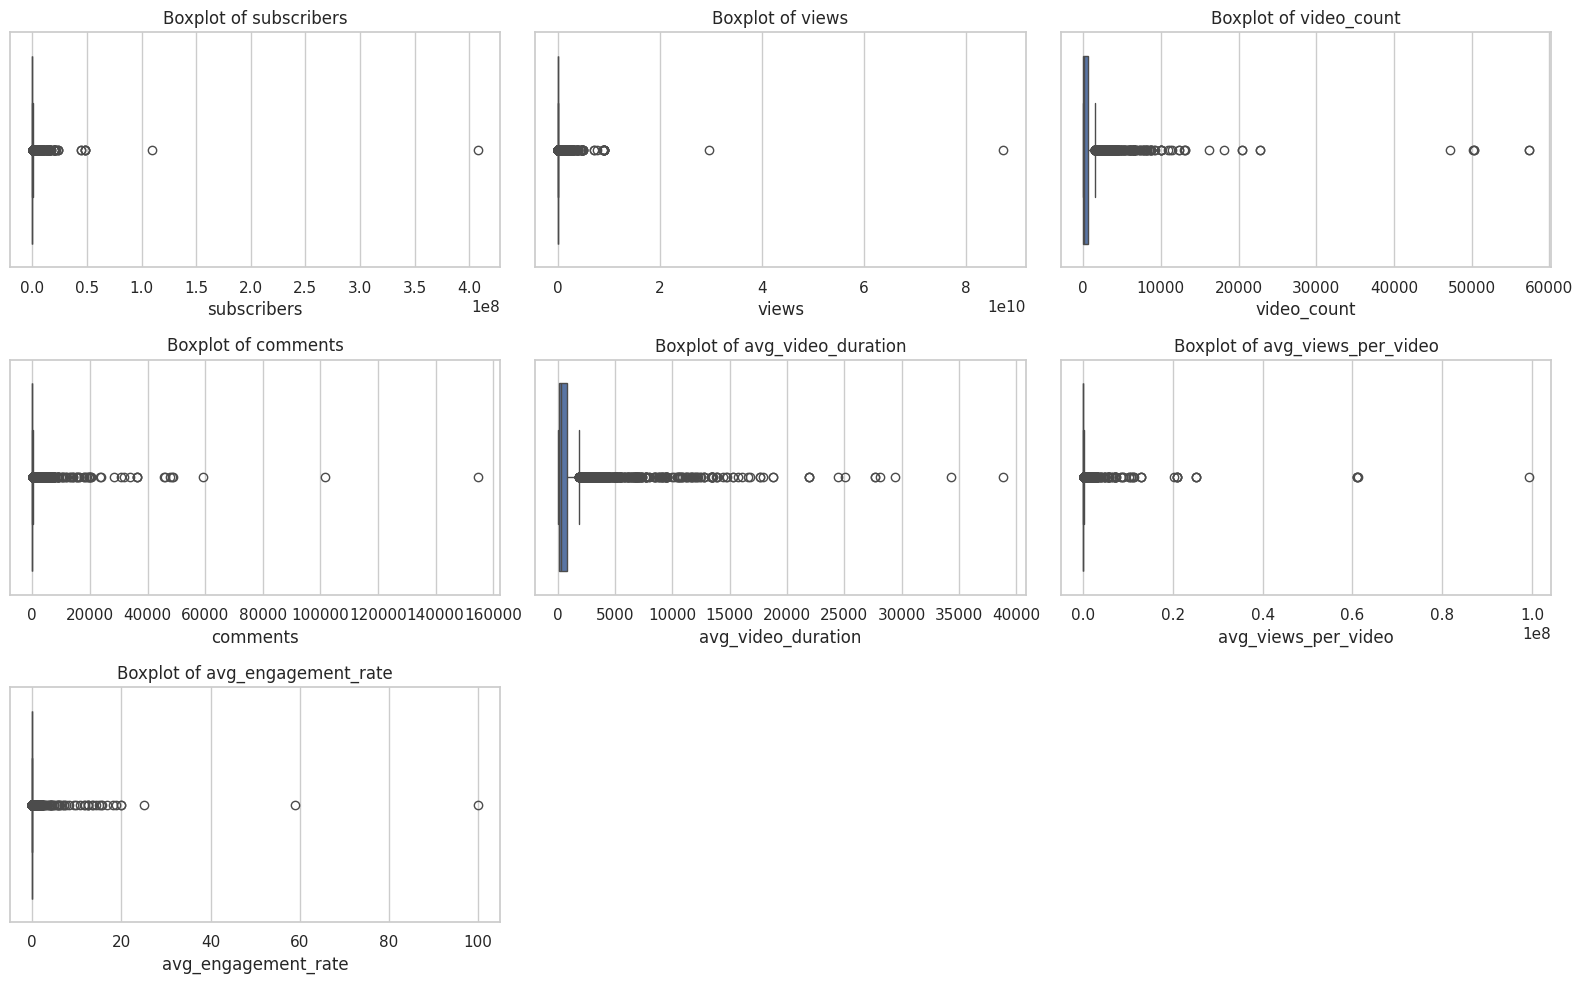

In [22]:
numerical_cols = [
    'subscribers', 'views', 'video_count', 'comments',
    'avg_video_duration', 'avg_views_per_video', 'avg_engagement_rate'
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [23]:
data['hidden_subscribers_encoded'] = data['hidden_subscribers'].astype(int)

In [24]:
data.drop(columns=['hidden_subscribers'], inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder


# Label encode language
le = LabelEncoder()
data[['language','country','genre']] = data[['language','country','genre']].apply(lambda x: le.fit_transform(x.astype(str).fillna('Unknown')))

In [26]:
from sklearn.preprocessing import RobustScaler
import numpy as np

scaler = RobustScaler()
numerical_cols = [
    'subscribers', 'views', 'video_count', 'comments',
    'avg_video_duration', 'avg_views_per_video', 'avg_engagement_rate'
]

# Replace infinity values with NaN
data[numerical_cols] = data[numerical_cols].replace([np.inf, -np.inf], np.nan)

# Impute NaN values with the median of each column
for col in numerical_cols:
  data[col] = data[col].fillna(data[col].median())


# Apply scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [27]:
from collections import Counter
import re
def add_top_text_features(df, column, top_n=10, drop_original=True):
    """
    Extract top N frequent words from a text column and add binary features.
    """
    def clean_text(text):
        return re.sub(r'[^a-z0-9\s]', '', str(text).lower())

    # Clean and split
    data[column] = data[column].fillna('').astype(str)
    all_words = data[column].apply(clean_text).str.split()

    flat_words = [word for sublist in all_words for word in sublist]
    top_words = [word for word, count in Counter(flat_words).most_common(top_n)]

    # Create binary feature for each top word
    for word in top_words:
        data[f'{column}_{word}'] = data[column].apply(lambda x: int(word in clean_text(x)))

    if drop_original:
        data.drop(column, axis=1, inplace=True)

    return data

text_columns = ['title', 'video_title', 'keywords', 'top_video_tags']
for col in text_columns:
    data = add_top_text_features(data, column=col, top_n=10)

In [28]:
from datetime import datetime

# Ensure 'published_at' is datetime
data['published_at'] = pd.to_datetime(data['published_at'], errors='coerce')

# Step 1: Earliest video date per channel as proxy for channel creation date
channel_creation_proxy = data.groupby('channel_id')['published_at'].min().reset_index()
channel_creation_proxy.rename(columns={'published_at': 'channel_creation_date'}, inplace=True)

# Step 2: Count number of videos per channel by counting rows
video_counts = data.groupby('channel_id').size().reset_index(name='video_count')

# Step 3: Combine channel creation date and video counts
channel_stats = pd.merge(channel_creation_proxy, video_counts, on='channel_id')

# Step 4: Calculate channel age in months
today = pd.Timestamp.today()
channel_stats['channel_age_months'] = channel_stats['channel_creation_date'].apply(
    lambda x: (today.year - x.year) * 12 + (today.month - x.month) if pd.notnull(x) else 0
)

# Step 5: Calculate post frequency, avoid division by zero
channel_stats['post_frequency'] = channel_stats['video_count'] / channel_stats['channel_age_months'].replace(0, 1)

# Step 6: Merge back to original data if needed
data = data.merge(channel_stats[['channel_id', 'post_frequency']], on='channel_id', how='left')


In [29]:
# Convert to datetime (if not already) and make it timezone-naive
data['published_at'] = pd.to_datetime(data['published_at'], errors='coerce').dt.tz_convert(None)

# Encode as number of days since published
data['video_age_days'] = (pd.Timestamp.now().tz_localize(None) - data['published_at']).dt.days

# Drop the original datetime column
data.drop(columns=['published_at'], inplace=True)



In [30]:
data['video_age_days'] = data['video_age_days'].fillna(data['video_age_days'].median())


In [31]:
data.isna().sum()

,0
channel_id,0
country,0
language,0
subscribers,0
views,0
video_count,0
average_video_views,0
avg_video_duration,0
comments,0
genre,0


In [32]:
data.drop(columns=['channel_id'], inplace=True)

In [33]:
# Normalize views and engagement into a score
data['popularity_score'] = (
    data['views'] / data['subscribers'].replace(0, 1)  # avoid division by zero
) * data['avg_engagement_rate'].fillna(0)

# You can also log-transform to reduce skew:
import numpy as np
data['popularity_score'] = np.log1p(data['popularity_score'])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
data.head()

,country,language,subscribers,views,video_count,average_video_views,avg_video_duration,comments,genre,avg_engagement_rate,...,top_video_tags_for,top_video_tags_the,top_video_tags_2025,top_video_tags_how,top_video_tags_best,top_video_tags_gaming,top_video_tags_travel,post_frequency,video_age_days,popularity_score
0,77,6,36.314407,88.647095,-0.086468,3633925.6,-0.123104,107.494253,7,0.017250,...,0,0,0,0,0,0,1,0.046296,3313.0,0.041247
1,77,6,5.684509,14.206729,1.386943,39690.8,39.566537,1.655172,7,-0.087236,...,0,0,0,0,0,0,0,0.021127,4329.0,-0.245927
2,1,6,9.977213,35.851056,4.364894,4030.8,12.716948,0.000000,7,-0.098754,...,0,0,1,0,0,0,0,0.010989,5550.0,-0.438274
3,22,6,2.489188,5.711689,0.527454,5375.8,5.760728,-0.091954,7,-0.098999,...,1,0,0,0,0,0,0,0.008547,3566.0,-0.257688
4,77,6,8.298863,8.398564,0.316472,12592.6,8.671001,0.444444,7,-0.092897,...,0,0,0,0,0,0,0,0.042254,2186.0,-0.098731
